In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Base directory where datasets are stored
dir_nondensity = '../checkpoints/result/'
dir_density_1 = '../checkpoints/result_density/'
dir_density_2 = '../checkpoints/result_density_warmup/'
# datasets = ['Beauty', 'HoneyBee', 'Jockey']
datasets = ['Beauty', 'HoneyBee']


In [10]:
def parse_train_txt(base_line_fic, new_method_dict_1,new_method_dict_2):
    with open(base_line_fic, 'r') as file:
        lines = file.readlines()
        last_line = lines[-1].strip()
        data = last_line.split(',')
        result_1 = {
            'PSNR': float(data[1].split(':')[-1]),
            'MS-SSIM': float(data[2].split(':')[-1]),
            'Training': float(data[3].split(':')[-1][:-1]),
            'Eval': float(data[4].split(':')[-1][:-1]),
            'FPS': float(data[5].split(':')[-1]),
            'Size': float(data[6].split(':')[-1])
        }
    with open(new_method_dict_1, 'r') as file:
        lines = file.readlines()
        last_line = lines[-1].strip()
        data = last_line.split(',')
        result_2 = {
            'PSNR': float(data[1].split(':')[-1]),
            'MS-SSIM': float(data[2].split(':')[-1]),
            'Training': float(data[3].split(':')[-1][:-1]),
            'Eval': float(data[4].split(':')[-1][:-1]),
            'FPS': float(data[5].split(':')[-1]),
            'Size': float(data[6].split(':')[-1])
        }
    with open(new_method_dict_2, 'r') as file:
        lines = file.readlines()
        last_line = lines[-1].strip()
        data = last_line.split(',')
        result_3 = {
            'PSNR': float(data[1].split(':')[-1]),
            'MS-SSIM': float(data[2].split(':')[-1]),
            'Training': float(data[3].split(':')[-1][:-1]),
            'Eval': float(data[4].split(':')[-1][:-1]),
            'FPS': float(data[5].split(':')[-1]),
            'Size': float(data[6].split(':')[-1])
        }
    
    return result_1, result_2, result_3

In [11]:

# List to store results
results_baseline = []
results_new_method_1 = []
results_new_method_2 = []
# Loop through datasets and collect data from train.txt files
for dataset in datasets:
    dataset_path_baseline = os.path.join(dir_nondensity, dataset)
    dataset_path_new_method_1 = os.path.join(dir_density_1, dataset)
    dataset_path_new_method_2 = os.path.join(dir_density_2, dataset)
    for dir_name in os.listdir(dataset_path_baseline):
        if dir_name.startswith('GaussianImage_Cholesky'):
            gaussian_count = int(dir_name.split('_')[-1])
            if gaussian_count>2000:
                train_txt_path_baseline = os.path.join(dataset_path_baseline, dir_name, 'train.txt')
                train_txt_path_new_method_1 = os.path.join(dataset_path_new_method_1, dir_name, 'train.txt')
                train_txt_path_new_method_2 = os.path.join(dataset_path_new_method_2, dir_name, 'train.txt')
                if os.path.exists(train_txt_path_baseline) and os.path.exists(train_txt_path_new_method_1)and os.path.exists(train_txt_path_new_method_2):
                    result_baseline, result_new_method_1,result_new_method_2  = parse_train_txt(train_txt_path_baseline,train_txt_path_new_method_1,train_txt_path_new_method_2)
                    result_baseline['GaussianCount'] = gaussian_count
                    result_baseline['Dataset'] = dataset
                    result_new_method_1['GaussianCount'] = gaussian_count
                    result_new_method_1['Dataset'] = dataset
                    result_new_method_2['GaussianCount'] = gaussian_count
                    result_new_method_2['Dataset'] = dataset
                    results_baseline.append(result_baseline)
                    results_new_method_1.append(result_new_method_1)
                    results_new_method_2.append(result_new_method_2)
# Sort the results by GaussianCount before converting to DataFrame
results_sorted_baseline = sorted(results_baseline, key=lambda x: x['GaussianCount'])
# Convert results to a DataFrame
df_baseline = pd.DataFrame(results_sorted_baseline)
# Sort the results by GaussianCount before converting to DataFrame
results_sorted_new_method_1 = sorted(results_new_method_1, key=lambda x: x['GaussianCount'])
# Convert results to a DataFrame
df_new_method_1 = pd.DataFrame(results_sorted_new_method_1)
# Sort the results by GaussianCount before converting to DataFrame
results_sorted_new_method_2 = sorted(results_new_method_2, key=lambda x: x['GaussianCount'])
# Convert results to a DataFrame
df_new_method_2 = pd.DataFrame(results_sorted_new_method_2)


In [12]:
def plot_gaussian_vs_metrics(df_baseline, df_new_method_1,df_new_method_2):
    for dataset in datasets:
        # 按 GaussianCount 排序确保一致
        subset_df_baseline = df_baseline[df_baseline['Dataset'] == dataset].sort_values(by='GaussianCount')
        subset_df_new_method_1 = df_new_method_1[df_new_method_1['Dataset'] == dataset].sort_values(by='GaussianCount')
        subset_df_new_method_2 = df_new_method_2[df_new_method_2['Dataset'] == dataset].sort_values(by='GaussianCount')
       
        plt.figure(figsize=(5, 10))

        # 第一个子图：Gaussian count vs PSNR
        plt.subplot(2, 1, 1)

        # 添加散点图和连线
        plt.scatter(subset_df_baseline['GaussianCount'], subset_df_baseline['PSNR'], 
                    color='blue', alpha=0.7, s=50, label='BaseLine', edgecolor='black')
        plt.scatter(subset_df_new_method_1['GaussianCount'], subset_df_new_method_1['PSNR'], 
                    color='green', alpha=0.7, s=50, label='adaptive_control', edgecolor='black')
        plt.scatter(subset_df_new_method_2['GaussianCount'], subset_df_new_method_2['PSNR'], 
                    color='red', alpha=0.7, s=50, label='warm_up', edgecolor='black')


        # 绘制连线
        plt.plot(subset_df_baseline['GaussianCount'], subset_df_baseline['PSNR'], 
                 'b-', alpha=0.5)
        plt.plot(subset_df_new_method_1['GaussianCount'], subset_df_new_method_1['PSNR'], 
                 'g-', alpha=0.5)
        plt.plot(subset_df_new_method_2['GaussianCount'], subset_df_new_method_2['PSNR'], 
                 'r-', alpha=0.5)


        # 添加标题和标签
        plt.xlabel('Gaussian Number', fontsize=14, fontweight='bold')
        plt.ylabel('PSNR (dB)', fontsize=14, fontweight='bold')
        plt.title(f'{dataset} - Gaussian Number vs PSNR', fontsize=16, fontweight='bold')

        # 调整 X 轴刻度和网格
        plt.xticks(range(4000, 10000, 2000))
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend()

        # 第二个子图：Gaussian count vs MS-SSIM
        plt.subplot(2, 1, 2)
     
        plt.scatter(subset_df_baseline['GaussianCount'], subset_df_baseline['MS-SSIM'], 
                    color='blue', alpha=0.7, s=50, label='BaseLine', edgecolor='black')
        plt.scatter(subset_df_new_method_1['GaussianCount'], subset_df_new_method_1['MS-SSIM'], 
                    color='green', alpha=0.7, s=50, label='adaptive_control', edgecolor='black')
        plt.scatter(subset_df_new_method_2['GaussianCount'], subset_df_new_method_2['MS-SSIM'], 
                    color='red', alpha=0.7, s=50, label='warm_up', edgecolor='black')


        # 绘制连线
        plt.plot(subset_df_baseline['GaussianCount'], subset_df_baseline['MS-SSIM'], 
                 'b-', alpha=0.5)
        plt.plot(subset_df_new_method_1['GaussianCount'], subset_df_new_method_1['MS-SSIM'], 
                 'g-', alpha=0.5)
        plt.plot(subset_df_new_method_2['GaussianCount'], subset_df_new_method_2['MS-SSIM'], 
                 'r-', alpha=0.5)

        # 添加标题和标签
        plt.xlabel('Gaussian Number', fontsize=14, fontweight='bold')
        plt.ylabel('MS-SSIM', fontsize=14, fontweight='bold')
        plt.title(f'{dataset} - Gaussian Number vs MS-SSIM', fontsize=16, fontweight='bold')

        # 调整 X 轴刻度和网格
        plt.xticks(range(4000, 10001, 2000))
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend()

        # 布局调整
        plt.tight_layout()

        # 保存图像
        plt.savefig(f'./img_compare/{dataset}_gaussian_vs_metrics.png')

        # 显示图像
        plt.show()


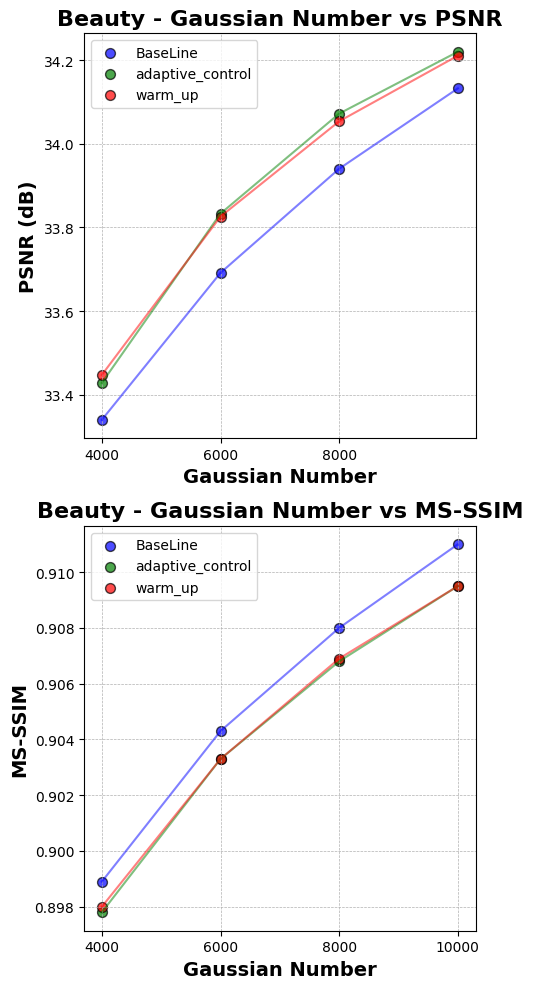

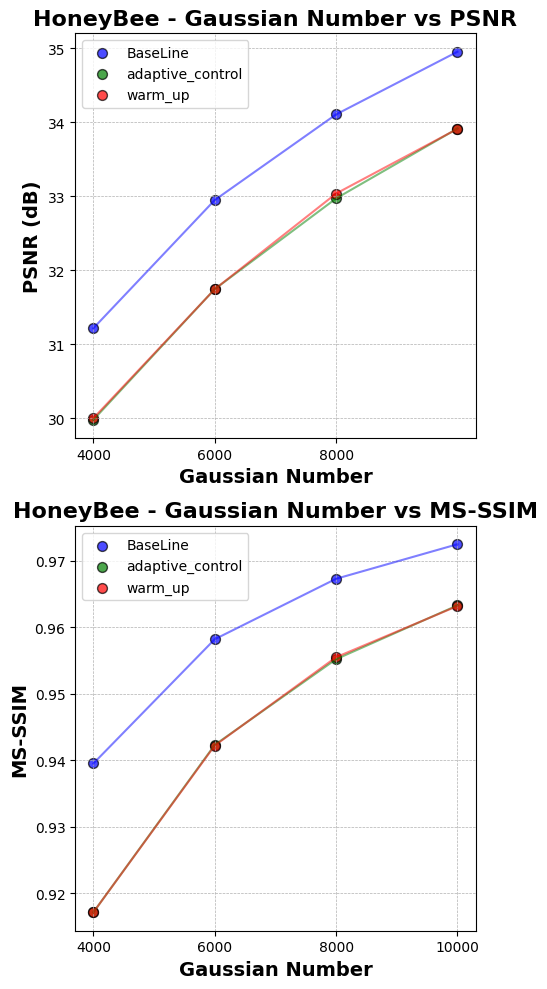

In [13]:
plot_gaussian_vs_metrics(df_baseline,df_new_method_1,df_new_method_2)